<a href="https://colab.research.google.com/github/frankgeorge/EDA---Flipkart-Crawler-data/blob/master/EDA_Flipkart_Crawler_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#install dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#load data
df = pd.read_csv('/content/drive/MyDrive/ecommerce.csv')

In [6]:
df.shape

(20000, 15)

In [7]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [8]:
df.describe()

,retail_price,discounted_price
count,19922.000000,19922.000000
mean,2979.206104,1973.401767
std,9009.639341,7333.586040
min,35.000000,35.000000
25%,666.000000,350.000000
50%,1040.000000,550.000000
75%,1999.000000,999.000000
max,571230.000000,571230.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [10]:
df['product_name']

0            Alisha Solid Women's Cycling Shorts
1            FabHomeDecor Fabric Double Sofa Bed
2                                     AW Bellies
3            Alisha Solid Women's Cycling Shorts
4          Sicons All Purpose Arnica Dog Shampoo
                          ...                   
19995             WallDesign Small Vinyl Sticker
19996    Wallmantra Large Vinyl Stickers Sticker
19997    Elite Collection Medium Acrylic Sticker
19998    Elite Collection Medium Acrylic Sticker
19999    Elite Collection Medium Acrylic Sticker
Name: product_name, Length: 20000, dtype: object

In [11]:
#unique product names in crawler data
df['product_name'].unique()

array(["Alisha Solid Women's Cycling Shorts",
       'FabHomeDecor Fabric Double Sofa Bed', 'AW Bellies', ...,
       'We Witches Comfy Hues Women Wedges', 'Stylistry Women Heels',
       'Uberlyfe Extra Large Vinyl Sticker'], dtype=object)

In [12]:
#number of products
len(df['product_name'].unique())

12676

In [13]:
df['product_name'].value_counts()

TheLostPuppy Back Cover for Apple iPad Air                    134
TheLostPuppy Back Cover for Apple iPad Air 2                   95
S4S Stylish Women's Push-up Bra                                94
Voylla Metal, Alloy Necklace                                   66
WallDesign Small Vinyl Sticker                                 65
                                                             ... 
Vibrandz Grab Smart Phone Holder - MLVC-04                      1
Bike World Brake Light, Tail Light LED Bulb for  Volvo VNL      1
Allin Exporters Fennel Oil (Co2 Extract)                        1
keco Women Heels                                                1
Charvee Acrylic Bangle                                          1
Name: product_name, Length: 12676, dtype: int64

In [14]:
#product with highest number of repetitions
df['product_name'].value_counts().sort_values(ascending=False).iloc[0:30]

TheLostPuppy Back Cover for Apple iPad Air                          134
TheLostPuppy Back Cover for Apple iPad Air 2                         95
S4S Stylish Women's Push-up Bra                                      94
Voylla Metal, Alloy Necklace                                         66
WallDesign Small Vinyl Sticker                                       65
HomeeHub Polyester Multicolor Self Design Eyelet Door Curtain        58
DailyObjects Back Cover for Apple iPad 2/3/4                         52
Nimya Solid Men's Polo Neck T-Shirt                                  50
S4S Comfortable Women's Full Coverage Bra                            45
Grafion by Grafion - Comfort Feel Women's Full Coverage Bra          44
Theskinmantra Sleeve for All versions of Apple ipad                  43
DailyObjects Back Cover for Apple iPad Mini/Retina Display           42
First Smart Deal Plant Container Set                                 42
Grafion Comfortable Women's Full Coverage Bra                   

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


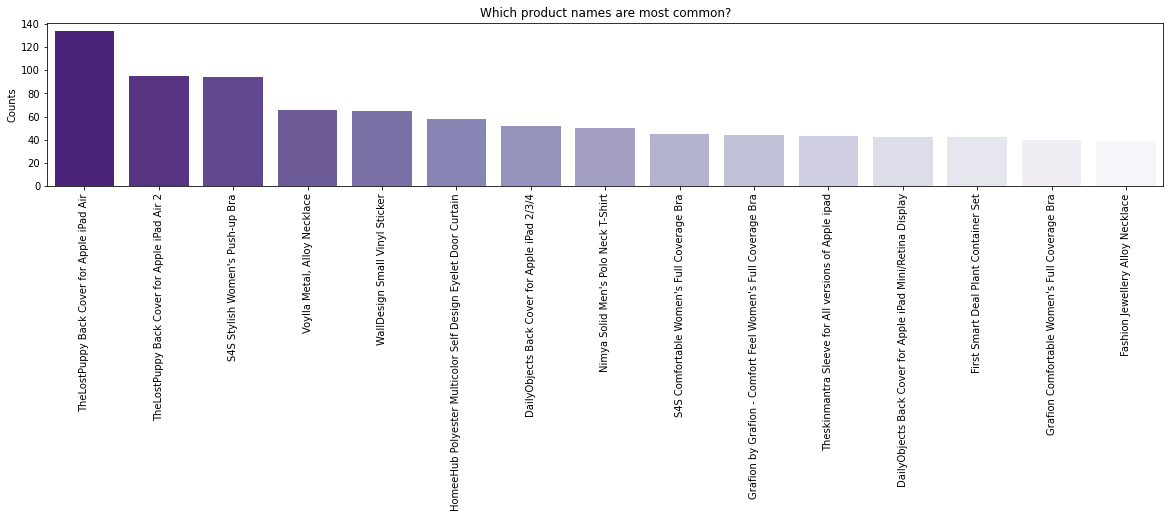

In [15]:
freq = df['product_name'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(20,3))
sns.barplot(freq.index, freq.values, palette="Purples_r")
plt.ylabel("Counts")
plt.title("Which product names are most common?");
plt.xticks(rotation=90);

In [16]:
#product category - higest
df['product_category_tree'].value_counts()

["Jewellery >> Necklaces & Chains >> Necklaces"]                                                                            1567
["Jewellery >> Rings"]                                                                                                       710
["Automotive >> Accessories & Spare parts >> Car Interior & Exterior >> Car Interior >> Car Mats"]                           522
["Jewellery >> Bangles, Bracelets & Armlets >> Bangles"]                                                                     430
["Tools & Hardware >> Tools >> Gardening Tools >> Plant Containers & Sets >> Plant Container Sets"]                          332
                                                                                                                            ... 
["Kitchen & Dining >> Housekeeping & Laundry >> Home Cleaning >> Dustbins >> Planet Dustbins"]                                 1
["Home Decor & Festive Needs >> Showpieces >> Ethnic >> Mahadev Handicrafts Ethnic"]             

In [17]:
#unique category trees
len(df['product_category_tree'].unique())

6466

In [18]:
len(df['brand'].unique())

3500

In [ ]:
EDA Result
1. number of unique products in df?
2. number of category trees?
3. most common products?
4. most common category?